In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# Create Results Dataframe

In [2]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))
    
    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df

In [3]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,RandomForest,19879.702171,16749.083333,0.986055
1,LinearRegression,16221.040791,12433.000000,0.990716
2,LSTM,16187.908301,13123.166667,0.990753
3,XGBoost,15701.003360,13342.666667,0.991301
4,ARIMA,14959.893467,11265.335749,0.983564


# Plot Results

In [4]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model", ylabel = "Scores", title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'../model_output/compare_models.png')

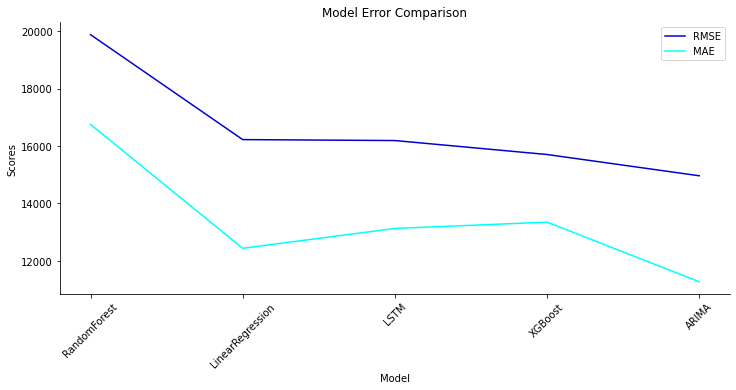

In [5]:
plot_results(results)

In [6]:
average_monthly_sales = 894478 # see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
